# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1ThpK_nfciHuTnUuIxDiLqhuPsWsqV-q7?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [1]:
# importação da biblioteca pandas e atribuindo um apelido à ela
import pandas as pd

In [2]:
# importação da base de dados e atribuindo a base de dados a uma variável
tabela = pd.read_csv(
    r'C:\Users\Virtual Office\Python\Módulo 50 - Python aplicação no mercado de trabalho\Intensivão de Python\Aula 4\advertising.csv'
    )
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [3]:
# Camandos de análise para compreensão dos dados que estão na base de dados, informações gerais, tipo, valores vazios e correlação.
print(tabela.info())
print(tabela.isna().sum())
display(tabela.describe())
display(tabela.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64


,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


In [4]:
# importação das bibliotecas de gráficos 
import seaborn as sns
import matplotlib.pyplot as plt

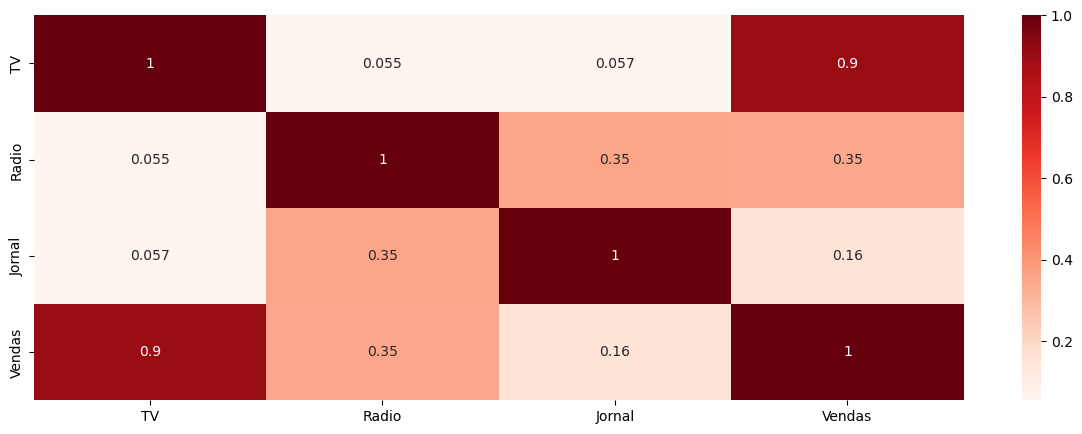

In [5]:
# Analisando de forma visual a correlação que os dados tem entre si através do mapa de calor
# Quanto mais próximo de 1, maior a correlação; quanto mais próximo de -1 menor é a correlação
plt.figure(figsize = (15,5))

sns.heatmap(tabela.corr(), cmap = 'Reds', annot = True)

plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [6]:
# x -> Dados que serão usados como característica para prever Y
x = tabela[['TV', 'Radio', 'Jornal']]
# y -> Variável a ser prevista
y = tabela['Vendas']

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.3)



#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [7]:
# Importação das duas AI que serão testadas 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Variáveis recebendo os modelos de AI
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()
# Treinando a AI
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [8]:

from sklearn.metrics import r2_score
# Configurando a AI para previsão
previsao_arvoredecisao = modelo_regressaolinear.predict(x_teste)
previsao_regressaolinear = modelo_arvoredecisao.predict(x_teste)
# Resultado em percentual da precisão da previsão dos preços por cada modelo de AI
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste,previsao_arvoredecisao))

0.9504403167646047
0.901455847894029


#### Visualização Gráfica das Previsões

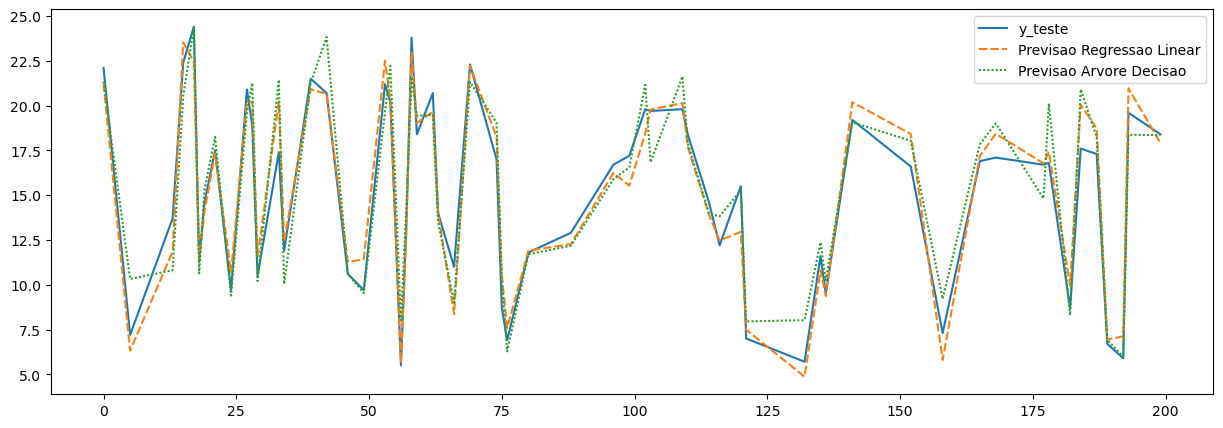

In [9]:
# Conferindo por gráfico de linha a previsão de cada modelo de AI
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsao Regressao Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsao Arvore Decisao'] = previsao_arvoredecisao

plt.figure(figsize=(15,5))
sns.lineplot(tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [10]:
# Importação de dados diferentes para AI prever o preço
tabela_nova = pd.read_csv(
    r'C:\Users\Virtual Office\Python\Módulo 50 - Python aplicação no mercado de trabalho\Intensivão de Python\Aula 4\novos.csv'
)
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [11]:
# Previsão dos preços
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

[ 7.717  8.358 21.033]
